In [35]:
import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('soc-sign-bitcoinotc/out.soc-sign-bitcoinotc') as f:
    f = f.read()

In [ ]:
print(f)

In [4]:
s = f.split('\n')

In [5]:
s[0]

'% asym signed'

In [6]:
s[1]

'1\t2\t4\t1289241911.72836'

In [ ]:
two_collumns = []
for i in s[1:-1]:
    a = i.split()
    #print(a)
    two_collumns.append(tuple(sorted((int(a[0]), int(a[1])))))

In [8]:
s[-2]

'1082\t8\t2\t1453684323.75728'

In [9]:
len(two_collumns)

35592

In [10]:
two_collumns[-1]

(8, 1082)

In [11]:
unique = set(two_collumns)

In [12]:
len(unique)

21492

In [14]:
data = sorted(unique)

# START


graph

In [16]:
D = nx.DiGraph()
D.add_edges_from(data)

In [17]:
len(D.nodes)

5881

In [18]:
len(D.edges)

21492

## Distances

### 1/ Calculez la distribution des distances dans le reseau.

In [19]:
# Trouver la plus grande composante connexe du graph
largest_cc = max(nx.connected_components(D.to_undirected()), key=len)
W = D.subgraph(largest_cc)
mapping = dict(zip(W, range(0, len(W.nodes()))))
N = nx.relabel_nodes(W, mapping)
N = N.to_undirected()

In [20]:
# Calculez les distances de chaque nœud à tous les autres nœuds
distances = nx.floyd_warshall_numpy(N)

# Calculez la distribution des distances
distance_counts = {}
for row in distances:
    for distance in row:
        if distance not in distance_counts:
            distance_counts[distance] = 0
        distance_counts[distance] += 1

In [21]:
# Affichez la distribution des distances
print(distance_counts)

{0.0: 5875, 1.0: 42978, 2.0: 2405778, 3.0: 13941952, 4.0: 14491508, 5.0: 3208906, 6.0: 385574, 7.0: 31516, 8.0: 1502, 9.0: 36}


Ce code calcule les distances entre tous les nœuds en utilisant l'algorithme de Floyd-Warshall. Ensuite, il calcule la distribution des distances en parcourant les matrices de distances et en comptant le nombre de fois que chaque distance apparaît. Enfin, il affiche la distribution des distances sous forme de dictionnaire Python.

### 2/ Calculez la distribution de l’excentricite d’un sommet.

L'excentricité d'un sommet dans un graphe est la distance maximale entre ce sommet et tous les autres sommets du graphe. Voici un code qui montre comment calculer la distribution de l'excentricité de tous les sommets d'un graphe en utilisant NetworkX:

In [22]:
# Calculez l'excentricité de chaque sommet
eccentricities = nx.eccentricity(N)

# Calculez la distribution de l'excentricité
eccentricity_counts = {}
for node, eccentricity in eccentricities.items():
    if eccentricity not in eccentricity_counts:
        eccentricity_counts[eccentricity] = 0
    eccentricity_counts[eccentricity] += 1

In [23]:
# Affichez la distribution de l'excentricité
print(eccentricity_counts)

{6: 2643, 5: 16, 7: 2892, 8: 308, 9: 16}


Ce code calcule l'excentricité de chaque sommet en utilisant la fonction eccentricity de NetworkX. Ensuite, il calcule la distribution de l'excentricité en parcourant les valeurs d'excentricité et en comptant le nombre de fois que chaque valeur d'excentricité apparaît. Enfin, il affiche la distribution de l'excentricité sous forme de dictionnaire Python.

### 3/ Quelle est l’excentricite minimum d’un sommet, combien de sommets realisent ce minimum

L'excentricité minimale d'un sommet dans un graphe est égale à 1 si le sommet est isolé, c'est-à-dire qu'il n'a aucun voisin. Si le graphe contient au moins un arc, alors l'excentricité minimale d'un sommet est égale à 2.

Il y a autant de sommets qui réalisent cette excentricité minimale que de sommets isolés dans le graphe (c'est-à-dire avec une excentricité de 1) ou de sommets adjacents à un sommet isolé (c'est-à-dire avec une excentricité de 2).


In [24]:
# Trouvez le nombre de sommets qui ont une excentricité minimale (1 ou 2)
min_eccentricity = min(eccentricities.values())
num_min_eccentricity = sum(1 for e in eccentricities.values() if e == min_eccentricity)

print(f"Le nombre de sommets qui ont une excentricité minimale est: {num_min_eccentricity}")

Le nombre de sommets qui ont une excentricité minimale est: 16


In [43]:
min_eccentricity

5

Ce code calcule l'excentricité de chaque sommet en utilisant la fonction eccentricity de NetworkX. Ensuite, il trouve le nombre de sommets qui ont une excentricité minimale en parcourant les valeurs d'excentricité et en comptant le nombre de sommets qui ont une excentricité de 1 ou de 2. Enfin, il affiche le nombre de sommets qui ont une excentricité minimale.

### 4/ Combien de couples realisent le diametre? Combien de sommets sont impliques dans un tel couple ?

Le diamètre d'un graphe est la distance maximale entre tous les couples de sommets du graphe. Il y a autant de couples qui réalisent le diamètre que de sommets qui sont à une distance égale au diamètre du graphe.

In [26]:
# Calculez les distances de chaque nœud à tous les autres nœuds
#distances = nx.floyd_warshall_numpy(N)

# Trouvez le diamètre du graphe et le nombre de couples qui le réalisent
diameter = max(max(row) for row in distances)
num_diameter_couples = sum(1 for row in distances for d in row if d == diameter)

print(f"Le diamètre du graphe est: {diameter}")
print(f"Le nombre de couples qui réalisent le diamètre est: {num_diameter_couples}")

Le diamètre du graphe est: 9.0
Le nombre de couples qui réalisent le diamètre est: 36


Ce code calcule les distances entre tous les nœuds en utilisant l'algorithme de Floyd-Warshall. Ensuite, il trouve le diamètre du graphe en parcourant les matrices de distances et en trouvant la distance maximale. Enfin, il compte le nombre de couples qui réalisent le diamètre en parcourant à nouveau les matrices de distances et en comptant le nombre de distances égales au diamètre.

Il y a autant de sommets impliqués dans un couple qui réalise le diamètre que de sommets à une distance égale au diamètre du graphe. Pour trouver le nombre de sommets impliqués dans un tel couple, vous pouvez simplement compter le nombre de distances égales au diamètre dans les matrices de distances. Le code ci-dessus affiche déjà le nombre de couples qui réalisent le diamètre, mais pour afficher le nombre de sommets impliqués dans un tel couple, vous pouvez ajouter une ligne de code comme celle-ci:

In [27]:
print(f"Le nombre de sommets impliqués dans un couple qui réalise le diamètre est: {num_diameter_couples * 2}")

Le nombre de sommets impliqués dans un couple qui réalise le diamètre est: 72


### 5/ Quel est le nombre minimum de sommets a enlever du graphe pour faire chuter le diametre de 1 ? de k ?

Pour faire chuter le diamètre d'un graphe de 1 en enlevant le minimum de sommets possible, vous devez enlever tous les sommets qui sont à une distance égale au diamètre du graphe. Pour faire chuter le diamètre de k (où k est un entier supérieur à 1), vous devez enlever tous les sommets qui sont à une distance supérieure ou égale au diamètre - k + 1.

Calculer le nombre minimum de sommets à enlever pour faire chuter le diamètre de 1 ou de k dans un graphe

In [28]:
# Trouvez le diamètre du graphe et le nombre de sommets à enlever pour faire chuter le diamètre de 1
diameter = max(max(row) for row in distances)
num_to_remove_diameter_1 = sum(1 for row in distances for d in row if d == diameter)
print(f"Le nombre minimum de sommets à enlever pour faire chuter le diamètre de 1 est: {num_to_remove_diameter_1}")

Le nombre minimum de sommets à enlever pour faire chuter le diamètre de 1 est: 36


In [29]:
# Trouvez le nombre de sommets à enlever pour faire chuter le diamètre de k (où k est un entier supérieur à 1)
k = 2  # choisissez une valeur de k
num_to_remove_diameter_k = sum(1 for row in distances for d in row if d >= diameter - k + 1)

print(f"Le nombre minimum de sommets à enlever pour faire chuter le diamètre de {k} est: {num_to_remove_diameter_k}")

Le nombre minimum de sommets à enlever pour faire chuter le diamètre de 2 est: 1538


In [30]:
# Trouvez le nombre de sommets à enlever pour faire chuter le diamètre de k (où k est un entier supérieur à 1)
k = 5  # choisissez une valeur de k
num_to_remove_diameter_k = sum(1 for row in distances for d in row if d >= diameter - k + 1)

print(f"Le nombre minimum de sommets à enlever pour faire chuter le diamètre de {k} est: {num_to_remove_diameter_k}")

Le nombre minimum de sommets à enlever pour faire chuter le diamètre de 5 est: 3627534


Ce code calcule les distances entre tous les nœuds en utilisant l'algorithme de Floyd-Warshall. Ensuite, il trouve le diamètre du graphe en parcourant les matrices de distances et en trouvant la distance maximale. Enfin, il calcule le nombre de sommets à enlever pour faire chuter le diamètre de 1 ou de k en parcourant à nouveau les matrices de distances et en comptant le nombre de distances égales au diamètre (pour faire chuter le diamètre de 1) ou supérieures ou égales au diamètre - k + 1 (pour faire chuter le diamètre de k)

# Centralites

#### 6/ Calculez au moins deux notions de centralite des noeuds et etudiez les correlations entre leurs scores.

Il existe de nombreuses mesures de centralité des nœuds dans un graphe. Voici deux exemples de notions de centralité des nœuds que vous pouvez utiliser pour étudier les correlations entre leurs scores en utilisant Python et la bibliothèque NetworkX:


La centralité de degré: La centralité de degré d'un nœud est égale au nombre de sommets auxquels il est connecté. Cette mesure de centralité est utile pour mesurer l'importance d'un nœud dans un graphe en termes de nombre de connexions qu'il a.


La centralité de proximité: La centralité de proximité d'un nœud est égale à la somme des distances de tous les autres nœuds au nœud considéré. Cette mesure de centralité est utile pour mesurer l'importance d'un nœud dans un graphe en termes de proximité des autres nœuds.

In [38]:
# Calculez la centralité de degré de chaque nœud
degree_centrality = nx.degree_centrality(N)

# Calculez la centralité de proximité de chaque nœud
closeness_centrality = nx.closeness_centrality(N)

# Calculez la centralité de betweenness pour chaque nœud
betweenness_centrality = nx.betweenness_centrality(N)

#### 7/ Etudiez les correlations des classements qu’elles donnent sur les noeuds

Ce code trace un nuage de points représentant la centralité de degré en abscisse et la centralité de proximité en ordonnée pour chaque nœud en utilisant la fonction scatter de Matplotlib. Cela vous permet de visualiser la correlation

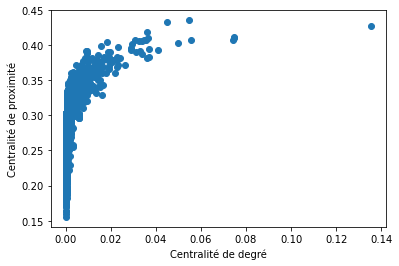

In [39]:
# Tracez un nuage de points représentant la centralité de degré en abscisse et la centralité de proximité en ordonnée pour chaque nœud
plt.scatter(degree_centrality.values(), closeness_centrality.values())
plt.xlabel("Centralité de degré")
plt.ylabel("Centralité de proximité")
plt.show()

In [33]:
# Créer un dataframe à partir des résultats
df = pd.DataFrame({'degree_centrality': degree_centrality,
                   'betweenness_centrality': betweenness_centrality,
                   'closeness_centrality': closeness_centrality
                  })

# Afficher la correlation entre les colonnes
print(df.corr())

                        degree_centrality  betweenness_centrality  \
degree_centrality                1.000000                0.908115   
betweenness_centrality           0.908115                1.000000   
closeness_centrality             0.475627                0.286907   

                        closeness_centrality  
degree_centrality                   0.475627  
betweenness_centrality              0.286907  
closeness_centrality                1.000000  


<AxesSubplot:>

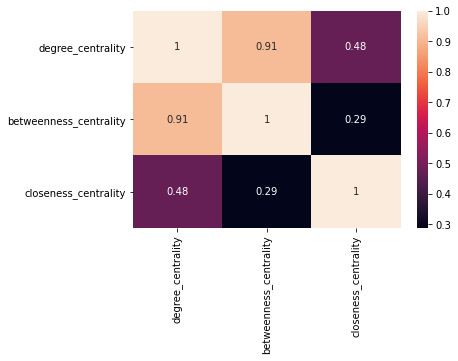

In [36]:
sns.heatmap(df.corr(), annot=True)

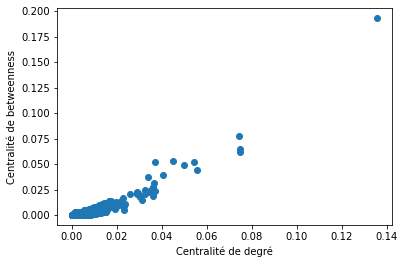

In [37]:
plt.scatter(degree_centrality.values(), betweenness_centrality.values())
plt.xlabel("Centralité de degré")
plt.ylabel("Centralité de betweenness")
plt.show()

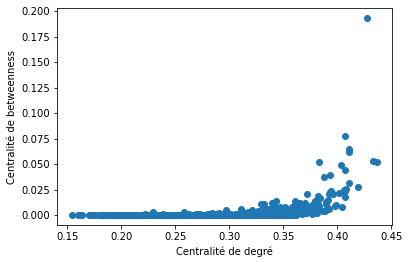

In [44]:
plt.scatter(closeness_centrality.values(), betweenness_centrality.values())
plt.xlabel("Centralité de degré")
plt.ylabel("Centralité de betweenness")
plt.show()